# Introduction to Machine Learning

## Supervised Learning

### Linear Regression

In [1]:
import numpy as np

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
 
#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

Text(0, 0.5, 'house price')

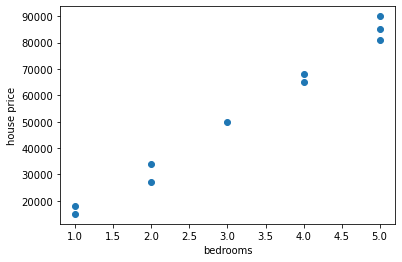

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms,house_price)
plt.xlabel("bedrooms")
plt.ylabel("house price")

In [3]:
from sklearn.linear_model import LinearRegression
bedrooms = bedrooms.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(bedrooms,house_price)

LinearRegression()

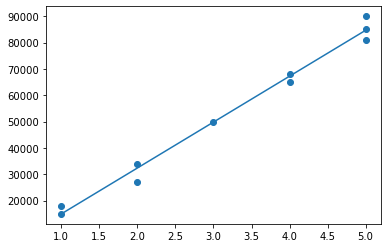

In [4]:
plt.scatter(bedrooms,house_price)
plt.plot(bedrooms,linreg.predict(bedrooms))

In [5]:
X_VALUE = 3
result = linreg.predict(np.array([X_VALUE]).reshape(-1,1))

### With Data

In [7]:
import pandas as pd
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
X = df[['bathrooms','bedrooms']]
y = df['price']

In [9]:
from sklearn import linear_model

In [10]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [11]:
regr.predict([[1.00,3]])

array([267552.38641795])

### Logistic Regression

In [58]:
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')

In [59]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [60]:
dataset.drop('User ID',axis=1,inplace=True)

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [62]:
dataset = pd.get_dummies(dataset)
dataset

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [63]:
X = dataset[['Age','EstimatedSalary','Gender_Female','Gender_Male']]
y = dataset['Purchased']

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data,columns=X.columns)
scaled_data

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204
...,...,...,...,...
395,0.797057,-0.844019,0.980196,-0.980196
396,1.274623,-1.372587,-1.020204,1.020204
397,1.179110,-1.460681,0.980196,-0.980196
398,-0.158074,-1.078938,-1.020204,1.020204


In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size = 0.2,random_state = 1)

In [66]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
from sklearn.preprocessing import StandardScaler

model.score(X_test,y_test)

0.825

In [71]:
sample_data = X.iloc[3,:].tolist()

In [72]:
model.predict([sample_data])

array([1], dtype=int64)

### Decision Tree

In [22]:
import pandas as pd

iris = pd.read_csv('Iris.csv')

In [23]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
iris.drop('Id',axis=1,inplace=True)

In [25]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [26]:
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = iris['Species']

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X,y)

DecisionTreeClassifier()

In [28]:
sample_data = X.iloc[149,:].tolist()

In [29]:
tree_model.predict([sample_data])

array(['Iris-virginica'], dtype=object)

In [30]:
set(y)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [31]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    rounded = True,
    filled = True
)

### Support Vector Machine

In [46]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
X = df[df.columns[:8]]
y = df['Outcome']

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [51]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train,y_train)

SVC()

In [38]:
clf.score(X_test,y_test)

0.7559055118110236

In [53]:
sample_data = X[149,:].tolist()

In [54]:
clf.predict([sample_data])

array([0], dtype=int64)

## Unsupervised Learning

### K means clustering

In [39]:
import pandas as pd

dataset = pd.read_csv('Mall_Customers.csv')
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [40]:
dataset = dataset.rename(columns={
    'CustomerID': 'customer_id',
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
})

dataset['gender'].replace({
    'Male': 1,
    'Female':0
},inplace=True)

dataset

,customer_id,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [41]:
from sklearn.cluster import KMeans

X = dataset.drop(['customer_id','gender'],axis=1)

clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

clusters

C:\Users\msi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75378.76464074482,
 58300.443321590676,
 51116.98694463434,
 44344.949801777206,
 40792.92500773284,
 37355.674517149535]

Text(0, 0.5, 'Inertia')

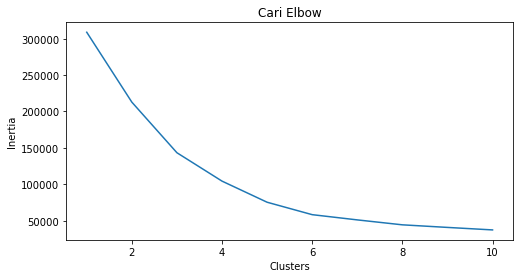

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig,ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)),y=clusters,ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

C:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


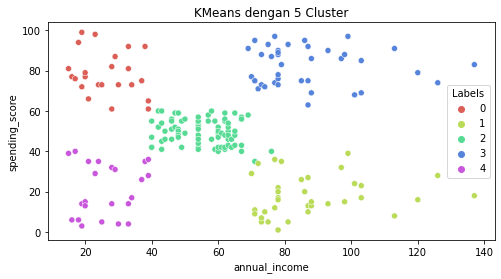

In [44]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()